# 딥러닝 기초 이론 
- 출처:더북(https://thebook.io/), 모두의 딥러닝 개정 3판

## 1. 선형회귀의 최소제곱법
- 선형 회귀란 임의의 직선을 그어 이에 대한 평균 제곱 오차를 구하고, 이 값을 가장 작게 만들어 주는 a 값과 b 값을 찾아가는 작업

In [2]:
import numpy as np

In [3]:
# 공부시간(x), 점수(y) 배열 생성
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [4]:
# 평균변수 생성
mx = np.mean(x)
my = np.mean(y)

### 기울기 a 구하기

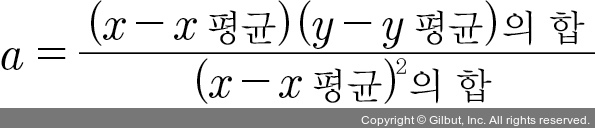

In [5]:
# a의 분모값
divisor = sum([(i - mx)**2 for i in x])

In [6]:
# a의 분자값
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d

dividend = top(x, mx, y, my)

# • def는 함수를 만들 때 사용하는 예약어입니다. 여기서는 top() 함수를 새롭게 만들었고, 
#   그 안에 최소 제곱법의 분자식을 그대로 가져와 구현했습니다.

# • len()은 리스트 안에 들어 있는 원소 개수를 알려 줍니다. 
#   x 리스트의> 원소가 네 개이므로 len(x)는 4가 됩니다.

# • range()는 0부터 괄호 안의 숫자 바로 전까지 연속적인 숫자 객체를 만들어 줍니다. 
#   즉, range(4)는 0, 1, 2, 3의 숫자를 생성하게 됩니다.

In [9]:
print("분모: ", divisor)
print("분자: ", dividend)

분모:  20.0
분자:  46.0


In [7]:
a = dividend / divisor

### y절편 b 구하기

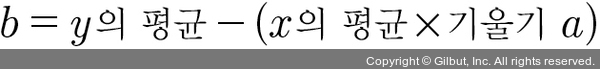

In [8]:
b = my - (mx*a)

In [10]:
print("기울기 a = ", a)
print("y 절편 b = ", b)

기울기 a =  2.3
y 절편 b =  79.0


---

## 2. 평균 제곱 오차
- 최소제곱법을 이용해 기울기와 y절편을 편리하게 구했지만 여러 개의 입력을 처리하기엔 무리가 있음
- 가장 많이 사용하는 방법은 조금씩 수정해나가는 방법으로, <br>가설을 세운 후 이 값이 주어진 요건을 충족하는지 판단해서 조금씩 변화를 주며 오차가 최소가 될 때까지 반복하는 방법이다.(딥러닝 원리)

- 오차를 확인하는 방법은 점과 그래프 사이의 거리를 재면 된다. (<b> 오차 = 실제값 - 예측값<b> )<br>
- 직선들의 합이 클수록 잘못 그어진 직선이다.(기울기가 너무 크거나 작은 경우)<br>
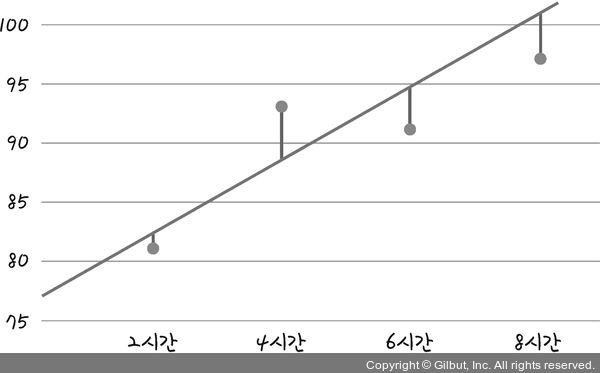

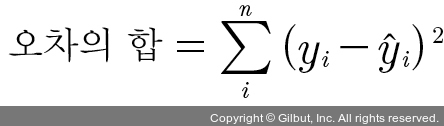
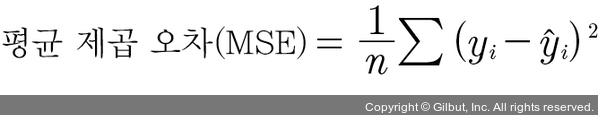

### 평균 제곱 오차 구하기

In [11]:
# 기울기 a와 y 절편 b의 값이 각각 3과 76이라 가정
fake_a = 3
fake_b = 76

def predict(x):
    return fake_a * x + fake_b

In [15]:
predict_result = []
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100


In [13]:
n = len(x)  
def mse(y, y_pred):
    return (1/n) * sum((y - y_pred)**2)

In [14]:
print("평균 제곱 오차: " + str(mse(y, predict_result)))

평균 제곱 오차: 11.0


In [ ]:
# 처음 가정한  a = 3, b = 76의 오차가 약 11.0인 것을 확인
# 오차가 최소화되는 a 값과 b 값을 구해야 함

---

## 3. 경사하강법

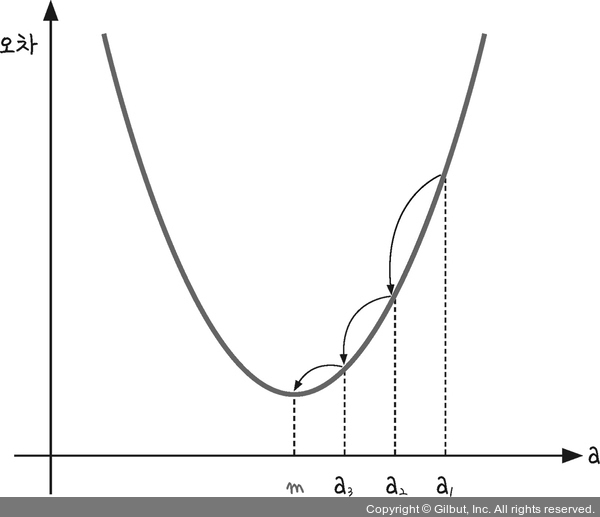
- 오차가 가장 작을 때는 기울기 a가 m의 위치에 있을 때다.<br>
- 결국 기울기를 적절히 바꾸어 a2, a3으로 이동시키다 결국 m에 이르게 하면 최적의 기울기를 찾게 된다.<br>
- 미분 기울기를 이용하여 반복적으로 기울기 a를 변화시켜서 m 값을 찾아내는 방법<br>
- <b>순간 기울기가 0인 점이 최솟값 m<b>

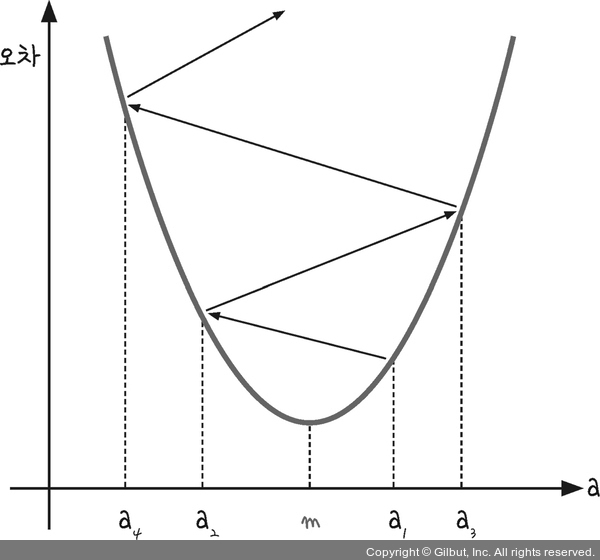
- 이때, 기울기의 적절한 거리를 찾지 못하면 한 점으로 수렴하지 않고 발산<br>
- 학숩률 값을 적절히 바꾸며 최적의 학습률(이동거리)을 찾아야 함<br>
- <b>결론적으로 경사 하강법은 오차의 변화에 따라 이차 함수 그래프를 만들고 적절한 학습률을 설정해 미분 값이 0인 지점을 구하는 것<b>

- 평균 제곱 오차식에 y_hat을 대입<br>
<img src = 'https://thebook.io/img/080324/fx-39.jpg' width ='40%' height='40%'/><br>
<img src = 'https://thebook.io/img/080324/fx-4.jpg' width ='40%' height='40%'/><br>
<img src = 'https://thebook.io/img/080324/fx-5.jpg' width ='40%' height='40%'/>

In [16]:
y_pred = a * x + b            # 예측값
error = y - y_pred            # 실제값 - 예측값

a_diff = (2/n) * sum(-x * (error))  # 오차 함수를 a로 편미분
b_diff = (2/n) * sum(-(error))      # 오차 함수를 b로 편미분

In [17]:
lr = 0.03               # 학습률 지정
a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트
b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트

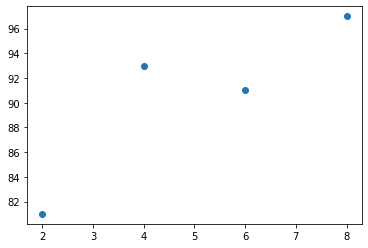

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


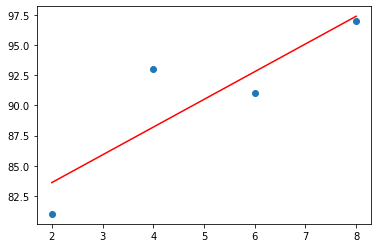

In [18]:
import matplotlib.pyplot as plt

# 공부 시간 X와 성 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 데이터의 분포를 그래프로 나타냅니다.
plt.scatter(x, y)
plt.show()

# 기울기 a의 값과 절편 b의 값을 초기화합니다.
a = 0
b = 0

# 학습률을 정합니다.
lr = 0.03

# 몇 번 반복될지 설정합니다.
epochs = 2001 

# x 값이 총 몇 개인지 셉니다.
n = len(x)

# 경사 하강법을 시작합니다.
for i in range(epochs):      # 에포크 수만큼 반복합니다.
    y_pred = a * x + b       # 예측 값을 구하는 식입니다.
    error = y - y_pred       # 실제 값과 비교한 오차를 error로 놓습니다.

    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.

    a = a - lr * a_diff   # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff   # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:      # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        
# 앞서 구한 최종 a 값을 기울기, b 값을 y 절편에 대입해 그래프를 그립니다.
y_pred = a * x + b      

# 그래프를 출력합니다.
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()

---

## 4. 다중선형회귀

<img src = 'https://thebook.io/img/080324/fx-51.jpg' width ='30%' height='30%'/>

In [19]:
x1 = np.array([2, 4, 6, 8])      # 공부 시간
x2 = np.array([0, 4, 2, 3])      # 과외 수업 횟수
y = np.array([81, 93, 91, 97])

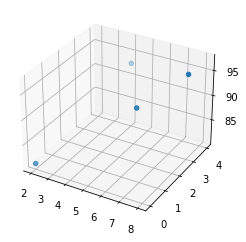

In [20]:
# 데이터 분포 확인
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y);
plt.show()

- 선형회귀는 선을 긋는 작업이라면 다중선형회귀는 최적 결과를 찾은 후 그래프 표현 시 평면으로 표시됨<br>
<img src = 'https://thebook.io/img/080324/089_1.jpg' width ='50%' height='50%'/>

### 경사하강법 적용

In [22]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a1 = 0
a2 = 0
b = 0

In [24]:
# 학습률을 정합니다.
lr = 0.01 

# 몇 번 반복될지 설정합니다.
epochs = 2001 

# x 값이 총 몇 개인지 셉니다. x1과 x2의 수가 같으므로 x1만 세겠습니다.
n = len(x1)

# 경사 하강법을 시작합니다.
for i in range(epochs):             # 에포크 수만큼 반복합니다.
    
    y_pred = a1 * x1 + a2 * x2 + b  # 예측 값을 구하는 식을 세웁니다.
    error = y - y_pred              # 실제 값과 비교한 오차를 error로 놓습니다.
    
    a1_diff = (2/n) * sum(-x1 * (error))  # 오차 함수를 a1로 편미분한 값입니다.
    a2_diff = (2/n) * sum(-x2 * (error))  # 오차 함수를 a2로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))        # 오차 함수를 b로 편미분한 값입니다.
    
    a1 = a1 - lr * a1_diff      # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff      # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff         # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:   # 100번 반복될 때마다 현재의 a1, a2, b의 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [25]:
print("실제 점수: ", y)
print("예측 점수: ", y_pred)

실제 점수:  [81 93 91 97]
예측 점수:  [80.76387645 92.97153922 91.42520875 96.7558749 ]


---

## 5. 로지스틱회귀

- 선형회귀처럼 적절한 선을 그려가는 과정으로, 직선이 아니라 참/거짓(1/0)을 구분함<br>
- 시그모이드 함수 사용 (y값은 0과 1사이)<br>
<img src = 'https://thebook.io/img/080324/fx-52.jpg' width ='20%' height='20%'/><br>
<img src = 'https://thebook.io/img/080324/101.jpg' width ='50%' height='50%'/><br>
<img src = 'https://thebook.io/img/080324/102_1.jpg' width ='50%' height='50%'/>

- 평균 제곱 오차를 대체할 만한 손실 함수를 머신 러닝에서는 교차 엔트로피 오차(cross entropy error) 함수라고 합니다.<br>즉, 선형 회귀에서는 평균 제곱 오차 함수를, 로지스틱 회귀에서는 교차 엔트로피 오차 함수를 사용<br><br>
<img src = 'https://thebook.io/img/080324/fx-53.jpg' width ='40%' height='40%'/>

### 텐서플로 코드

Epoch 1/5000
1/1 [==============================] - 0s 243ms/step - loss: 2.3576
Epoch 2/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.0177
Epoch 3/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.6997
Epoch 4/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.4127
Epoch 5/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.1677
Epoch 6/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.9738
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.8327
Epoch 8/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7374
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6758
Epoch 10/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6364
Epoch 11/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6109
Epoch 12/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5941
Epoch 13/5000
1/1 [============================

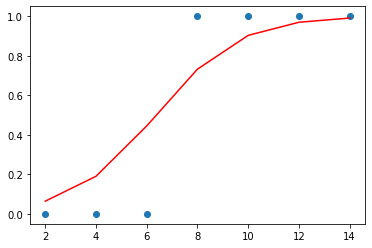

1/1 [==============================] - 0s 26ms/step
7시간을 공부할 경우, 합격 예상 확률은 59.7%입니다.


In [16]:
## 텐서플로
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# 교차 엔트로피 오차 함수를 이용하기 위해 'binary_crossentropy'로 설정합니다.
model.compile(optimizer='sgd', loss='binary_crossentropy')
model.fit(x, y, epochs=5000)

1/1 [==============================] - 0s 15ms/step


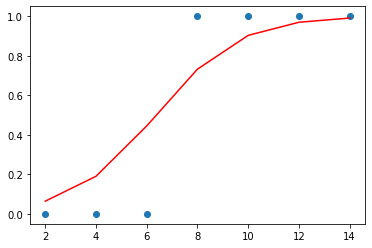

1/1 [==============================] - 0s 28ms/step
7시간을 공부할 경우, 합격 예상 확률은 59.7%입니다.


In [17]:
# 그래프로 확인해 봅니다.
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()

# 임의의 학습 시간을 집어넣어 합격 예상 확률을 예측해 보겠습니다.
hour = 7
prediction = model.predict([hour])
print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다." % (hour,
prediction * 100))

---

## 6. 퍼셉트론

<img src = 'https://thebook.io/img/080324/111_1.jpg' width ='60%' height='60%'/>
<img src = 'https://thebook.io/img/080324/111_2.jpg' width ='60%' height='60%'/>
<img src = 'https://thebook.io/img/080324/112_1.jpg' width ='60%' height='60%'/>


- 이때, 가중합(weighted sum)이란 입력 값과 가중치를 모두 곱한 후 바이어스를 더한 값

<img src = 'https://thebook.io/img/080324/113.jpg' width ='40%' height='40%'/>


- 퍼셉트론이나 아달라인은 모두 2차원 평면상에 직선을 긋는 것만 가능하지만 선을 그어도 해결되지 않는 상황이 존재함
- 퍼셉트론 한계를 가장 잘 설명하는 예제가 XOR 문제다. (논리회로 개념)

<img src = 'https://thebook.io/img/080324/117_1.jpg' width ='80%' height='80%'/>
<img src = 'https://thebook.io/img/080324/114.jpg' width ='50%' height='50%'/>

- 이는 다층 퍼셉트론(multilayer perceptron), 오차 역전파(back propagation)로 해결 가능

### 다층 퍼셉트론
- 차원을 달리하여 해결하는 것으로 즉, 종이를 휘어 주어 선 두 개를 동시에 긋는 방법이다.
- XOR 문제에 적용하면 ‘퍼셉트론 두 개를 한 번에 계산’하면 된다는 결론
- 이를 위해 퍼셉트론 두 개를 각각 처리하는 은닉층(hidden layer)을 만듭니다.
<img src = 'https://thebook.io/img/080324/116_2.jpg' width ='50%' height='50%'/>
<img src = 'https://wikidocs.net/images/page/24958/oragateandnandgate.PNG' width ='50%' height='50%'/>

- OR, NAND의 각 결과값을 가지고 AND 처리를 하면 XOR 해결할 수 있음

- 1) 입력값에 가중치(w)를 곱하고 바이어스(b)를 더해 은닉층으로 전송함
- 2) 1)의 값들이 은닉층의 노드로 모임
- 3) 은닉층에 취합된 값들은 활성화함수(시그모이드함수)를 통해 계산됨 (n1, n2)
<img src = 'https://thebook.io/img/080324/fx-54.jpg' width ='40%' height='40%'/>

- 4) 위 결과값은 출력층으로 전달되고 y예측값을 정함<br>
<img src = 'https://thebook.io/img/080324/fx-55.jpg' width ='40%' height='40%'/>

- 5) 가중치와 바이어스 값 설정(가중치 6개, 바이어스 3개 필요<br>
<img src = 'https://thebook.io/img/080324/fx-56.jpg' width ='30%' height='30%'/>
<br><br>
<img src = 'https://thebook.io/img/080324/118.jpg' width ='60%' height='60%'/>

In [3]:
# 가중치, 바이어스 설정
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

In [4]:
# 퍼셉트론 함수
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1

In [5]:
# NAND 게이트
def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)

# OR 게이트
def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)

# AND 게이트
def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

# XOR 게이트
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

In [6]:
# x1 값과 x2 값을 번갈아 대입해 가며 최종 값을 출력
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(x[0], x[1])
    print("입력 값: " + str(x) + " 출력 값: " + str(y))

입력 값: (0, 0) 출력 값: 0
입력 값: (1, 0) 출력 값: 1
입력 값: (0, 1) 출력 값: 1
입력 값: (1, 1) 출력 값: 0


### 오차 역전파
- XOR 문제를 다층 퍼셉트론으로 해결했지만 은닉층에 포함된 가중치를 업데이트할 수 없는 문제를 해결할 수 있음
- 또한, 가중치와 바이어스를 미리 설정하는 것이 아니라 데이터를 통해 스스로 가중치를 조절할 수 있어야 함
<img src = 'https://thebook.io/img/080324/127.jpg' width ='70%' height='70%'/>

- 또다른 문제점, 출력층에서 시작된 가중치 업데이트가 처음층까지 전달되지 않는 현상으로 <br>이는 활성화 함수로 사용된 시그모이드 함수 특성 때문임
<img src = 'https://thebook.io/img/080324/128.jpg' width ='70%' height='70%'/>
<br><br>
- <b>이를 해결하기 위한 새로운 활성화 함수는 렐루함수<b>
- 렐루는 x가 0보다 작을 때 모든 값을 0으로 처리하고, 0보다 큰 값은 x를 그대로 사용하는 방법으로<br>x가 0보다 크기만 하면 미분값이 1이 됨
<img src = 'https://thebook.io/img/080324/129_2.jpg' width ='70%' height='70%'/>

## 7. 실습: 폐암 수술 환자 생존율 예측

In [1]:
# 텐서플로 라이브러리 안에 있는 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터를 다루는 데 필요한 라이브러리를 불러옵니다.
import numpy as np

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git   

# 준비된 수술 환자 데이터를 불러옵니다.
Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",") 

X = Data_set[:,0:16]  # 환자의 진찰 기록을 X로 지정합니다.
y = Data_set[:,16]    # 수술 1년 후 사망/생존 여부를 y로 지정합니다.

## model = Sequential()
# 모델 구조를 짜고 층을 설정하는 부분
# .add()를 통해 새로운 층 생성 가능
model = Sequential()

## model.add(Dense(30, input_dim=16, activation='relu'))
# add로 새로운 층을 만들고 나면 Dense() 함수의 첫번째 인자에
# 몇 개의 노드를 해당 층에 만들 것인지 지정
# input_dim은 데이터 속성 개수, activation는 활성화 함수
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## model.compile(loss='binary_crossentropy', 
#                          optimizer='adam', metrics= ['accuracy'])
# 지정한 모델이 효과적으로 구현될 수 있게 여러 가지 환경을 설정해 주면서 컴파일
# loss : 손실함수 지정
# optimizer : adam으로 현재 가장 많이 사용
# metrics : 모델 수행 결과를 학습셋에 대한 정확도에 기반해 결과를 출력
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])

## 25번 라인 history = model.fit(X, y, epochs=5, batch_size=16)
# epochs=5 : 각 샘플이 처음부터 끝까지 다섯 번 재사용될 때까지 실행을 반복
# batch_size : 샘플을 한번에 몇개씩 처리할지 지정
#              너무 크면 학습 속도가 느려지고, 
#              너무 작으면 각 실행 값의 편차가 생겨서 전체 결괏값이 불안정해짐
history = model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5


Cloning into 'data'...


30/30 [==============================] - 0s 1ms/step - loss: 1.0375 - accuracy: 0.8404
Epoch 2/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.8404
Epoch 3/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8489
Epoch 4/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.8489
Epoch 5/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.8489


<img src = 'https://thebook.io/img/080324/137.jpg' width ='40%' height='40%'/>

### 대표적인 오차 함수
<b>[평균제곱계열 (선형회귀)]<b>
- mean_squared_error : 평균 제곱 오차, mean(square(yt - yo))
- mean_absolute_error : 평균 절대 오차(실제 값과 예측 값 차이의 절댓값 평균) , mean(abs(yt - yo))
- mean_absolute_percentage_error : 평균 절대 백분율 오차(절댓값 오차를 절댓값으로 나눈 후 평균)
- mean_squared_logarithmic_error : 평균 제곱 로그 오차(실제 값과 예측 값에 로그를 적용한 값의 차이를 제곱한 값의 평균)
    
<b>[교차 엔트로피 계열 (다항 분류, 이항 분류)]<b>
- categorical_crossentropy : 범주형 교차 엔트로피(다항 분류, 여럿 중 하나를 예측할 때)
- binary_crossentropy : 이항 교차 엔트로피(이항 분류, 둘 중 하나를 예측할 때)

## 8. 과적합, 실습 : 초음파 광물 예측
- 학습셋만 가지고 평가할 때, 층을 더하거나 에포크(epoch) 값을 높여 실행 횟수를 늘리면 정확도가 계속해서 올라갈 수 있음
- 하지만 학습이 깊어져 학습셋 내부에서 성공률은 높아져도 테스트셋에서는 효과가 없다면 과적합이 발생하는 것

<img src = 'https://thebook.io/img/080324/171_1.jpg' width ='40%' height='40%'/>

In [2]:
# 초음파 광물 예측
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

# 광물 데이터를 불러옵니다.
df = pd.read_csv('./data/sonar3.csv', header=None)

# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

# 학습셋과 테스트셋을 구분합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history = model.fit(X_train, y_train, epochs=200, batch_size=10)

# 모델을 테스트셋에 적용해 정확도를 구합니다.
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

Epoch 1/200


fatal: destination path 'data' already exists and is not an empty directory.


15/15 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.5793
Epoch 2/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6522 - accuracy: 0.6483
Epoch 3/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.6690
Epoch 4/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6279 - accuracy: 0.6828
Epoch 5/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6141 - accuracy: 0.6966
Epoch 6/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6026 - accuracy: 0.6966
Epoch 7/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5921 - accuracy: 0.6966
Epoch 8/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5788 - accuracy: 0.7241
Epoch 9/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5674 - accuracy: 0.7517
Epoch 10/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5567 - accuracy: 0.7517
Epoch 11/200
15/15 [=

## 9. k교차검증, 초음파 광물 예측

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

# 광물 데이터를 불러옵니다.
df = pd.read_csv('./data/sonar3.csv', header=None)

# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

# 몇 겹으로 나눌 것인지 정합니다.
k = 5

# KFold 함수를 불러옵니다. 분할하기 전에 샘플이 치우치지 않도록 섞어 줍니다.
kfold = KFold(n_splits=k, shuffle=True)

# 정확도가 채워질 빈 리스트를 준비합니다.
acc_score = []

def model_fn():
    model = Sequential() # 딥러닝 모델의 구조를 시작합니다.
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# k겹 교차 검증을 이용해 k번의 학습을 실행합니다.
# for 문에 의해 k번 반복합니다.
# split()에 의해 k개의 학습셋, 테스트셋으로 분리됩니다.
for train_index, test_index in kfold.split(X): 
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]  
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0) 
    
    accuracy = model.evaluate(X_test, y_test)[1] # 정확도를 구합니다.
    acc_score.append(accuracy)                   # 정확도 리스트에 저장합니다.

# k번 실시된 정확도의 평균을 구합니다.
avg_acc_score = sum(acc_score) / k

# 결과를 출력합니다.
print('정확도: ', acc_score)
print('정확도 평균: ', avg_acc_score)

fatal: destination path 'data' already exists and is not an empty directory.


2/2 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7805
정확도:  [0.8571428656578064, 0.8809523582458496, 0.8809523582458496, 0.7804877758026123, 0.7804877758026123]
정확도 평균:  0.836004626750946


<img src = 'https://thebook.io/img/080324/185.jpg' width ='60%' height='40%'/>

## 10. 모델 성능 향상

### 실습 : 와인 종류 예측

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

# 와인 데이터를 불러옵니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로, 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', 
metrics=['accuracy'])

# 모델을 실행합니다.
history = model.fit(X_train, y_train, epochs=50, batch_size=500, 
validation_split=0.25) # 0.8 x 0.25 = 0.2

# 테스트 결과를 출력합니다.
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 30)                390       
                                                                 
 dense_21 (Dense)            (None, 12)                372       
                                                                 
 dense_22 (Dense)            (None, 8)                 104       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


fatal: destination path 'data' already exists and is not an empty directory.


8/8 [==============================] - 1s 22ms/step - loss: 3.4377 - accuracy: 0.2974 - val_loss: 1.5873 - val_accuracy: 0.7385
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 1.6174 - accuracy: 0.7508 - val_loss: 1.6150 - val_accuracy: 0.7569
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 1.4712 - accuracy: 0.7557 - val_loss: 1.2838 - val_accuracy: 0.7715
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 1.0381 - accuracy: 0.7839 - val_loss: 0.7547 - val_accuracy: 0.8169
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5320 - accuracy: 0.8365 - val_loss: 0.4158 - val_accuracy: 0.8277
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3543 - accuracy: 0.8553 - val_loss: 0.2527 - val_accuracy: 0.9185
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.2218 - accuracy: 0.9289 - val_loss: 0.2185 - val_accuracy: 0.9285
Epoch 8/50
8/8 [============================

In [ ]:
'''
먼저 세 개의 은닉층을 만들고 각각 30개, 12개, 8개의 노드를 만들어
50번 반복했을 때 정확도가 94.15%로 나타났습니다.
'''

In [6]:
# 모델 업데이트(model.compile()까지는 동일)
from tensorflow.keras.callbacks import ModelCheckpoint
# 모델이 저장되는 조건을 설정합니다.
modelpath = "./data/model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다. 
history = model.fit(X_train, y_train, epochs=50, batch_size=500, 
validation_split=0.25, verbose=0, callbacks=[checkpointer])

# 테스트 결과를 출력합니다.
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])


Epoch 1: saving model to ./data/model\01-0.9477.hdf5

Epoch 2: saving model to ./data/model\02-0.9446.hdf5

Epoch 3: saving model to ./data/model\03-0.9485.hdf5

Epoch 4: saving model to ./data/model\04-0.9446.hdf5

Epoch 5: saving model to ./data/model\05-0.9485.hdf5

Epoch 6: saving model to ./data/model\06-0.9462.hdf5

Epoch 7: saving model to ./data/model\07-0.9454.hdf5

Epoch 8: saving model to ./data/model\08-0.9446.hdf5

Epoch 9: saving model to ./data/model\09-0.9485.hdf5

Epoch 10: saving model to ./data/model\10-0.9500.hdf5

Epoch 11: saving model to ./data/model\11-0.9446.hdf5

Epoch 12: saving model to ./data/model\12-0.9500.hdf5

Epoch 13: saving model to ./data/model\13-0.9500.hdf5

Epoch 14: saving model to ./data/model\14-0.9446.hdf5

Epoch 15: saving model to ./data/model\15-0.9508.hdf5

Epoch 16: saving model to ./data/model\16-0.9500.hdf5

Epoch 17: saving model to ./data/model\17-0.9492.hdf5

Epoch 18: saving model to ./data/model\18-0.9485.hdf5

Epoch 19: saving m

In [ ]:
'''
파일명을 통해 에포크 수와 정확도를 알 수 있다. 
첫 번째 에포크에서 75.08%였던 정확도가 
50번째에서 95.54%로 업데이트되는 것과 
각 에포크별 모델이 지정된 폴더에 저장되는 것을 볼 수 있다. 

테스트하면 96.4%의 정확도를 보여준다.
'''

In [12]:
# 적절한 학습 횟수를 정하기 위해서는 
# 검증셋과 테스트셋의 결과를 그래프로 보는 것이 가장 좋
## 에포크 수를 2000으로 늘려 긴 학습한 후 확인
history = model.fit(X_train, y_train, 
                    epochs=1500, 
                    batch_size=500, 
                    validation_split=0.25)

Epoch 1/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0287 - accuracy: 0.9923 - val_loss: 0.0584 - val_accuracy: 0.9815
Epoch 2/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 0.9926 - val_loss: 0.0572 - val_accuracy: 0.9854
Epoch 3/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0231 - accuracy: 0.9941 - val_loss: 0.0541 - val_accuracy: 0.9854
Epoch 4/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0227 - accuracy: 0.9941 - val_loss: 0.0544 - val_accuracy: 0.9854
Epoch 5/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0225 - accuracy: 0.9946 - val_loss: 0.0554 - val_accuracy: 0.9854
Epoch 6/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0221 - accuracy: 0.9938 - val_loss: 0.0544 - val_accuracy: 0.9854
Epoch 7/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0222 - accuracy: 0.9938 - val_loss: 0.0548 - val_accuracy: 0.9846
Epoch 8/1500
8/8 [=

In [13]:
# history에 저장된 학습 결과를 확인
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.028688,0.992302,0.058365,0.981538
1,0.025210,0.992558,0.057208,0.985385
2,0.023062,0.994098,0.054123,0.985385
3,0.022673,0.994098,0.054417,0.985385
4,0.022454,0.994611,0.055418,0.985385
...,...,...,...,...
1495,0.012098,0.996408,0.100548,0.986154
1496,0.014000,0.996151,0.102656,0.988462
1497,0.013247,0.996151,0.100541,0.989231
1498,0.012280,0.995894,0.098949,0.987692


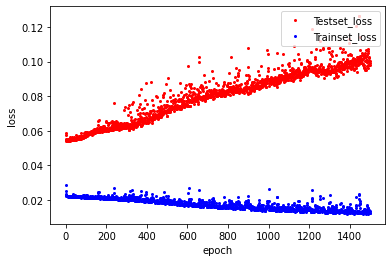

In [14]:
# y_vloss에 테스트셋의 오차를 저장합니다.
y_vloss = hist_df['val_loss']
# y_loss에 학습셋의 오차를 저장합니다
y_loss = hist_df['loss']

# x 값을 지정하고 테스트셋의 오차를 빨간색으로, 
# 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))

import matplotlib.pyplot as plt
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
'''
학습이 오래 진행될수록 검증셋의 오차(파란색)는 줄어들지만 
테스트셋의 오차(빨간색)는 다시 커진다.
이는 과도한 학습으로 과적합이 발생했기 때문이다.

이러한 사실을 통해 알 수 있는 것은 검증셋 오차가 커지기 직전까지 
학습한 모델이 최적의 횟수로 학습한 모델이다.
'''

In [15]:
## 학습 자동 중단
# EarlyStopping : 테스트셋 오차가 줄어들지 않으면 학습을 자동으로 멈추게 하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 학습이 언제 자동 중단될지 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 최적화 모델이 저장될 폴더와 모델 이름을 정합니다.
modelpath = "./data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
verbose=0, save_best_only=True)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, 
                    epochs=2000, 
                    batch_size=500, 
                    validation_split=0.25, 
                    verbose=1, 
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 25ms/step - loss: 0.0122 - accuracy: 0.9972 - val_loss: 0.0973 - val_accuracy: 0.9908
Epoch 2/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0128 - accuracy: 0.9972 - val_loss: 0.0978 - val_accuracy: 0.9885
Epoch 3/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0148 - accuracy: 0.9959 - val_loss: 0.1015 - val_accuracy: 0.9908
Epoch 4/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.9954 - val_loss: 0.1080 - val_accuracy: 0.9854
Epoch 5/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0130 - accuracy: 0.9964 - val_loss: 0.0995 - val_accuracy: 0.9877
Epoch 6/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0123 - accuracy: 0.9964 - val_loss: 0.1116 - val_accuracy: 0.9838
Epoch 7/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0139 - accuracy: 0.9951 - val_loss: 0.1009 - val_accuracy: 0.9892
Epoch 8/2000
8/8 [

In [ ]:
'''
96.4% 정확도에서 98.85%까지 성능이 향상된 것을 알 수 있다.
'''

## a. 모델 저장과 재사용

In [ ]:
# 모델 이름과 저장할 위치를 함께 지정합니다.
model.save('./data/model/my_model.hdf5')

# 불러오기
from tensorflow.keras.models import Sequential, load_model
# 모델이 저장된 위치와 이름까지 적어 줍니다.
model = load_model('./data/model/my_model.hdf5')

# 불러온 모델을 테스트셋에 적용해 정확도 구하기
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

## b. 모델 업데이트

In [ ]:
#  50번째 에포크의 검증셋 정확도가 0.9346이라면 
# 50-0.9346.hdf5라는 이름으로 저장
modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"

In [ ]:
# 학습 중인 모델을 저장하는 함수는 케라스 API의 ModelCheckpoint()
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)